Download the data...

- https://osf.io/fqm7x/download/

In [3]:
import pandas as pd
import numpy as np

s2_df = pd.read_excel('data/jayavulu/Supplementary_Table2.xlsx')
s2_df = s2_df.sort_values('log2FC').dropna(subset=['log2FC'])
s2_df = s2_df[s2_df['anno']=='tested_uncharacterized_CREs']
# s2_df['y']=np.where(s2_df['MPRA_validated_silencer']=='YES',1,0)
s2_df

,peakid,chr,start,end,anno,log2FC,P-val,adj.P-val,repressor_status,MPRA_validated_silencer
3336,peak3337,chr19,8631775,8631975,tested_uncharacterized_CREs,-8.619535,8.083598e-53,9.069733e-50,known_repressor,YES
370,peak371,chr1,113408175,113408375,tested_uncharacterized_CREs,-8.556838,8.220468e-53,9.069733e-50,known_repressor,YES
4086,peak4087,chr2,234276376,234276576,tested_uncharacterized_CREs,-8.453036,8.458711e-53,9.069733e-50,no_known_repressor,YES
2883,peak2884,chr17,47401936,47402136,tested_uncharacterized_CREs,-8.111884,9.451333e-53,9.069733e-50,no_known_repressor,YES
2850,peak2851,chr17,41121376,41121576,tested_uncharacterized_CREs,-8.086608,9.524018e-53,9.069733e-50,no_known_repressor,YES
...,...,...,...,...,...,...,...,...,...,...
921,peak922,chr10,32837196,32837396,tested_uncharacterized_CREs,2.057311,1.000000e+00,1.000000e+00,no_known_repressor,NO
6876,peak6877,chr7,157726195,157726395,tested_uncharacterized_CREs,2.093301,1.000000e+00,1.000000e+00,known_repressor,NO
6156,peak6157,chr6,140075755,140075955,tested_uncharacterized_CREs,2.093681,9.999999e-01,1.000000e+00,known_repressor,NO
1170,peak1171,chr11,3319156,3319356,tested_uncharacterized_CREs,2.159843,1.000000e+00,1.000000e+00,no_known_repressor,NO


<AxesSubplot:xlabel='log2FC', ylabel='Count'>

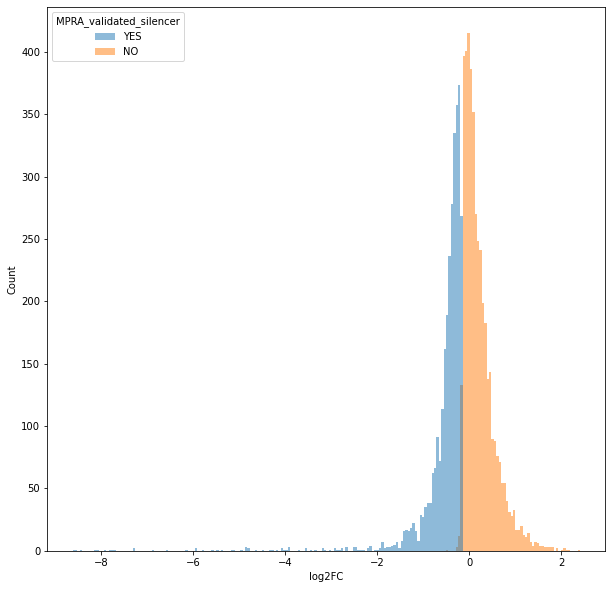

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=s2_df, x='log2FC', hue='MPRA_validated_silencer', stat='count', edgecolor=None)
# ax.set_title('Glucose')

DeepSilencer data:
    - will try regression instead...

<AxesSubplot:xlabel='log2FC', ylabel='Count'>

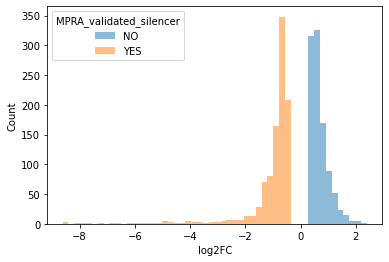

In [8]:
top = s2_df.nlargest(1000,'log2FC')
bottom=s2_df.nsmallest(1000,'log2FC')
sns.histplot(data=pd.concat([top,bottom]), x='log2FC', hue='MPRA_validated_silencer', stat='count', edgecolor=None)

In [104]:
s2_df = pd.concat([top,bottom])

Will first try classification (can return to log2FC later).
- using `MPRA_validated_silencer` as label.

In [10]:
s2_df = s2_df.drop(set(s2_df.columns) - set(['chr', 'start','end', 'log2FC']),axis=1)
s2_df

,chr,start,end,log2FC
3336,chr19,8631775,8631975,-8.619535
370,chr1,113408175,113408375,-8.556838
4086,chr2,234276376,234276576,-8.453036
2883,chr17,47401936,47402136,-8.111884
2850,chr17,41121376,41121576,-8.086608
...,...,...,...,...
921,chr10,32837196,32837396,2.057311
6876,chr7,157726195,157726395,2.093301
6156,chr6,140075755,140075955,2.093681
1170,chr11,3319156,3319356,2.159843


In [12]:
from tqdm.notebook import tqdm_notebook
import pybedtools

Now, generating sequences from BED columns...

In [13]:
tqdm_notebook.pandas(desc='Generating sequences...')
s2_bt=pybedtools.BedTool.from_dataframe(s2_df)
s2_df['seq']=s2_df.progress_apply(lambda x : s2_bt.seq(loc=x,fasta='hg19.fa'), axis=1)
s2_df

Generating sequences...:   0%|          | 0/7232 [00:00<?, ?it/s]

,chr,start,end,log2FC,seq
3336,chr19,8631775,8631975,-8.619535,tcttgaactcctgaatttcaagtaatcctcttgcttcagcctatga...
370,chr1,113408175,113408375,-8.556838,ttacaggcatgagccaccgcactcggccTTGTTAAACTTTTTTGTT...
4086,chr2,234276376,234276576,-8.453036,AATGCTCTGTGCTCTACCGCATCCCACTTGGAGGTGGGTGTGTCCT...
2883,chr17,47401936,47402136,-8.111884,agatgatgtttcactatgttggccaggctggtctcgaactcctgac...
2850,chr17,41121376,41121576,-8.086608,GTAAACCAACACTACTTTGTCATACATCATTAGTTTCAGGACtttt...
...,...,...,...,...,...
921,chr10,32837196,32837396,2.057311,gctattttaaagagagcaggagtatgaactggaggggcagagtcag...
6876,chr7,157726195,157726395,2.093301,CAGCTTTAGAGGAAGGGTGAGTCACTCTGACAGTTTTAGAGGAAGG...
6156,chr6,140075755,140075955,2.093681,TTTTCTAAGTTGTTAATTTGCTCCAGTGTTGTTGGGATAGTTGTGT...
1170,chr11,3319156,3319356,2.159843,caaccccctcctatcctctatcccgtgctctgaccttagtcgcccc...


In [14]:
# from motif.motif_utils import seq2kmer
from tqdm._tqdm_notebook import tqdm_notebook

def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers


Now, generating 6-mers from these sequences...

In [15]:
s2_df['X']= s2_df.progress_apply(lambda row: seq2kmer(row['seq'],6),axis=1)
s2_df

Generating sequences...:   0%|          | 0/7232 [00:00<?, ?it/s]

,chr,start,end,log2FC,seq,X
3336,chr19,8631775,8631975,-8.619535,tcttgaactcctgaatttcaagtaatcctcttgcttcagcctatga...,tcttga cttgaa ttgaac tgaact gaactc aactcc actc...
370,chr1,113408175,113408375,-8.556838,ttacaggcatgagccaccgcactcggccTTGTTAAACTTTTTTGTT...,ttacag tacagg acaggc caggca aggcat ggcatg gcat...
4086,chr2,234276376,234276576,-8.453036,AATGCTCTGTGCTCTACCGCATCCCACTTGGAGGTGGGTGTGTCCT...,AATGCT ATGCTC TGCTCT GCTCTG CTCTGT TCTGTG CTGT...
2883,chr17,47401936,47402136,-8.111884,agatgatgtttcactatgttggccaggctggtctcgaactcctgac...,agatga gatgat atgatg tgatgt gatgtt atgttt tgtt...
2850,chr17,41121376,41121576,-8.086608,GTAAACCAACACTACTTTGTCATACATCATTAGTTTCAGGACtttt...,GTAAAC TAAACC AAACCA AACCAA ACCAAC CCAACA CAAC...
...,...,...,...,...,...,...
921,chr10,32837196,32837396,2.057311,gctattttaaagagagcaggagtatgaactggaggggcagagtcag...,gctatt ctattt tatttt atttta ttttaa tttaaa ttaa...
6876,chr7,157726195,157726395,2.093301,CAGCTTTAGAGGAAGGGTGAGTCACTCTGACAGTTTTAGAGGAAGG...,CAGCTT AGCTTT GCTTTA CTTTAG TTTAGA TTAGAG TAGA...
6156,chr6,140075755,140075955,2.093681,TTTTCTAAGTTGTTAATTTGCTCCAGTGTTGTTGGGATAGTTGTGT...,TTTTCT TTTCTA TTCTAA TCTAAG CTAAGT TAAGTT AAGT...
1170,chr11,3319156,3319356,2.159843,caaccccctcctatcctctatcccgtgctctgaccttagtcgcccc...,caaccc aacccc accccc ccccct cccctc ccctcc cctc...


Subsetting dev and train datasets...

In [16]:
from sklearn.model_selection import train_test_split
data = s2_df[['X','log2FC']].rename(columns={'X':'sequence','log2FC':'label'})
train, dev = train_test_split(data, test_size=0.2)
train.to_csv('data/jayavulu/train.tsv', sep = '\t', index=False)
dev.to_csv('data/jayavulu/dev.tsv', sep = '\t', index=False)

In [111]:
s2_df.seq.str.len()

3780    200
1170    200
6156    200
6876    200
921     200
       ... 
3619    200
3715    200
7215    200
2549    200
5345    200
Name: seq, Length: 2000, dtype: int64

Now, can run fine-tuning process...

In [ ]:
%% bash

cd examples

export KMER=6
export MODEL_PATH=../pretrained_models/6-new-12w-0
export DATA_PATH=../data/jayavulu/new #sample_data/ft/prom-core/$KMER
export OUTPUT_PATH=../data/jayavulu/new #./ft/prom-core/$KMER

python run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna$KMER \
    --model_name_or_path $MODEL_PATH \
    --task_name dnaprom \
    --do_train \
    --do_eval \
    --data_dir $DATA_PATH \
    --max_seq_length 75 \
    --per_gpu_eval_batch_size=16   \
    --per_gpu_train_batch_size=16   \
    --learning_rate 2e-4 \
    --num_train_epochs 3.0 \
    --output_dir $OUTPUT_PATH \
    --evaluate_during_training \
    --logging_steps 100 \
    --save_steps 4000 \
    --warmup_percent 0.1 \
    --hidden_dropout_prob 0.1 \
    --overwrite_output \
    --weight_decay 0.01 \
    --n_process 8

***We collected the uncharacterized cis-regulatory elements (CREs) in K562 cells with MPRA provided by Jayavelu et al. Then we chose the top 2000 uncharacterized CREs sequences with the lowest MPRA activity as a positive set, and the bottom 2000 uncharacterized CREs with highest MPRA activity as a negative set.***

- ok for classification. but can directly perform regression (?).

### TEST DATA:

In [32]:
# encode_hg19_df = pd.read_csv('data/jayavulu/Candidate_silencers_and_uncharacterized_CREs_human_hg19_ENCODE_cell_types.txt',sep='\t')
# encode_hg19_df

,chr,start,end,peakid,cell_type,uniq_id,SVM_prediction
0,chr1,54375,54525,peak1,ENCU40,id1,Candidate_Silencer
1,chr1,54375,54525,peak1,ENCU53,id2,Candidate_Silencer
2,chr1,66275,66485,peak1,ENCU12,id5,uncharacterized_CRE
3,chr1,66335,66505,peak1,ENCU26,id6,uncharacterized_CRE
4,chr1,66355,66505,peak1,ENCU13,id7,Candidate_Silencer
...,...,...,...,...,...,...,...
2040019,chrY,28683355,28683505,peak810657,ENCU13,id3470182,uncharacterized_CRE
2040020,chrY,28721635,28721925,peak12267,ENCU50,id3470184,uncharacterized_CRE
2040021,chrY,28721695,28721845,peak232836,ENCU47,id3470186,uncharacterized_CRE
2040022,chrY,28734715,28734925,peak810658,ENCU13,id3470190,Candidate_Silencer


In [33]:
# roadmap_hg19_df = pd.read_csv('data/jayavulu/Candidate_silencers_and_uncharacterized_CREs_human_hg19_roadmap_cell_types.txt',sep='\t')
# roadmap_hg19_df

,chr,start,end,peakid,cell_type,uniq_id,SVM_prediction
0,chr1,928776,928917,peak1,E003,id1,uncharacterized_CRE
1,chr1,1153909,1154050,peak2,E003,id2,uncharacterized_CRE
2,chr1,1180000,1180068,peak3,E003,id3,uncharacterized_CRE
3,chr1,1218670,1218747,peak4,E003,id4,uncharacterized_CRE
4,chr1,1264431,1264522,peak5,E003,id5,uncharacterized_CRE
...,...,...,...,...,...,...,...
2253962,chrX,154853449,154853509,peak84098,E127,id2253963,Candidate_Silencer
2253963,chrX,155061594,155061704,peak84099,E127,id2253964,Candidate_Silencer
2253964,chrX,155067591,155067648,peak84100,E127,id2253965,Candidate_Silencer
2253965,chrX,155079045,155079099,peak84101,E127,id2253966,Candidate_Silencer


In [34]:
# hg_19_merged_df = pd.concat([roadmap_hg19_df,encode_hg19_df])
# hg_19_merged_df=hg_19_merged_df.reset_index(drop=True).drop('peakid',axis=1)
# hg_19_merged_df

,chr,start,end,cell_type,uniq_id,SVM_prediction
0,chr1,928776,928917,E003,id1,uncharacterized_CRE
1,chr1,1153909,1154050,E003,id2,uncharacterized_CRE
2,chr1,1180000,1180068,E003,id3,uncharacterized_CRE
3,chr1,1218670,1218747,E003,id4,uncharacterized_CRE
4,chr1,1264431,1264522,E003,id5,uncharacterized_CRE
...,...,...,...,...,...,...
4293986,chrY,28683355,28683505,ENCU13,id3470182,uncharacterized_CRE
4293987,chrY,28721635,28721925,ENCU50,id3470184,uncharacterized_CRE
4293988,chrY,28721695,28721845,ENCU47,id3470186,uncharacterized_CRE
4293989,chrY,28734715,28734925,ENCU13,id3470190,Candidate_Silencer
